In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pandas import Series, DataFrame

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge,RidgeCV#线性回归模型的岭回归
from datetime import datetime
# from sklearn.externals import joblib
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier     #随机森林用于分类
from sklearn.ensemble import RandomForestRegressor as RFR      #随机森林用于回归
from sklearn.model_selection import train_test_split           #划分训练集与测试集
from sklearn import metrics    
from sklearn.metrics import r2_score              #用于模型拟合优度评估
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr
pd.set_option('display.max_rows', 200)
 


In [3]:
import graphviz
from sklearn import tree


In [3]:
# 模型导入
GBRT_model = joblib.load("Polymer/GBRT_again.pkl")


In [4]:
# 模型训练数据导入
SHAP_DATE = pd.read_excel("Polymer/GBRT-polymer-6-again.xlsx",index_col='Unnamed: 0')
SHAP_DATE

,NAME,SPI,HATSs,L2m,CATS2D_03_AL,Mor25p,CATS2D_03_LL,PCE,Predict
0,BHJ-P1-iPr,113.524,15.681,13.960,12.0,-0.053,164.0,10.900,12.367472
2,D16,94.971,15.083,13.194,2.0,-0.667,156.0,16.220,15.266230
4,D18-Cl,102.284,15.709,19.122,8.0,0.771,156.0,16.740,14.131805
5,DPP2ThCl,74.914,14.567,19.183,20.0,-0.446,90.0,4.860,7.876528
8,J52,82.749,16.158,24.219,16.0,0.323,106.0,7.080,8.379153
9,J52-Cl,93.256,16.650,20.885,16.0,0.168,106.0,12.310,10.160758
10,J52-FS,94.941,16.514,31.490,16.0,-0.490,94.0,10.140,12.221486
11,J71,94.659,14.621,29.031,16.0,2.255,70.0,9.320,8.548447
12,P,53.437,19.976,42.599,12.0,-0.973,80.0,11.760,11.131461
14,P117,75.205,14.309,51.912,28.0,-0.264,90.0,11.970,10.032548


In [5]:
GBRT_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=22, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=290,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=50, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
X_train = SHAP_DATE[:90]
X_test = SHAP_DATE[91:]



In [7]:
# 数据标准化处理
stand_scaler = StandardScaler()
X_train_std = stand_scaler.fit_transform(X_train.iloc[:,1:7])
X_test_std = stand_scaler.transform(X_test.iloc[:,1:7]) 

(90, 9)

In [48]:
GBRT_model.predict(X_train_std)

array([12.367472  , 15.26623006, 14.13180518,  7.87652781,  8.37915286,
       10.1607581 , 12.22148565,  8.54844678, 11.13146067, 10.03254763,
       11.21520074, 12.30139041, 15.14788752, 10.69574552, 14.52949752,
       13.70256602, 13.71565037, 13.58052838, 13.06267186, 13.71591762,
        9.08817488, 16.20243407, 15.60753007, 14.70106235, 12.5001494 ,
        6.86921444, 11.4953282 , 13.44917301, 12.57839643, 15.26273867,
       10.20854223, 13.77012311, 12.6972149 , 11.16880044, 10.58777845,
       12.5001494 , 10.37427991,  9.86184637, 12.35402633, 14.73964366,
       15.53468501, 11.12462552, 15.64296402,  8.99288042, 11.65180928,
       12.17472348, 14.26280969,  6.75551596,  7.54517691,  6.85537534,
        7.9651566 , 11.55753544, 10.4547343 ,  8.24719081, 12.92401735,
        4.55077757, 13.71791026, 11.7950643 , 10.40869796,  8.9392517 ,
        9.34080122,  9.51117112, 10.51965505, 13.95743908, 12.92401735,
       11.18064186, 13.93318792, 11.43208305, 15.58561681, 12.08

In [8]:
X_train_std = pd.DataFrame(X_train_std)

In [9]:
X_train_std.columns = X_train.columns[1:7]

In [51]:
import shap
explainer = shap.TreeExplainer(GBRT_model)
shap_values = explainer(X_train_std)
shap.initjs()

In [24]:
shap_values

.values =
array([[-0.15796366,  0.36092963,  0.34031455, -0.74526632,  0.14031869],
       [-0.33757485, -1.20523067, -0.52347613, -0.75129736,  0.27635697],
       [-1.25726832, -0.85534121,  0.55590066, -0.62144114,  0.24115662],
       [ 0.60346305, -1.39794355, -0.29791166, -0.12057635,  0.37001428],
       [-1.89990375, -1.10487462, -0.64013351, -0.75098446,  0.34114441],
       [-2.15937875, -1.97360912, -0.55766723, -0.68565303, -1.3209859 ],
       [ 0.30974042,  0.41182025, -0.19303837, -0.69629365, -0.89964328],
       [ 0.10843374, -1.79374098, -0.4030637 , -0.67133512, -1.660087  ],
       [ 0.61266851,  0.30875647, -0.34566182,  0.51132353,  0.2985611 ],
       [ 0.07867573,  0.34951831,  1.07439245, -0.55362412,  0.26446349],
       [ 0.58570012,  0.60446185, -0.3512115 ,  0.51971397,  0.28056306],
       [ 0.41809996,  0.33656262,  0.21954644,  0.53893692,  0.27212133],
       [ 0.46755641, -1.71667618, -0.42519577, -0.75129736, -0.82836662],
       [ 0.58245003, -1.1439

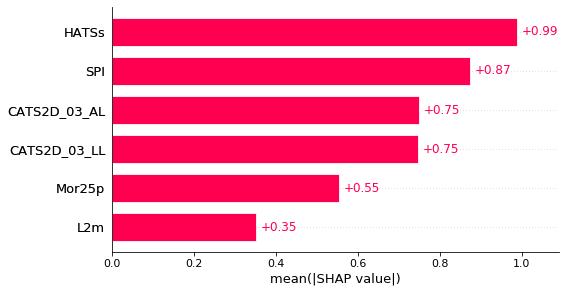

In [52]:
plt.figure(figsize=(15,8))
shap.plots.bar(shap_values,show = False)
plt.savefig('./SHAP_Bar_polymer-again.jpg')


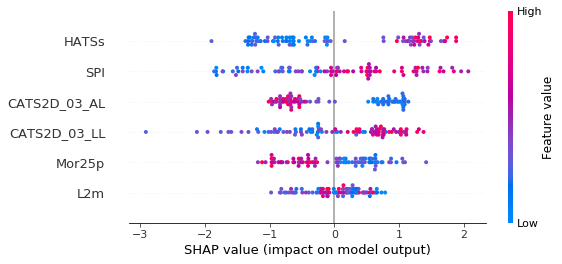

In [53]:
plt.figure(figsize=(20,8))
shap.plots.beeswarm(shap_values,show=False)
plt.savefig('./SHAP_beeswarm_polymer-again.jpg')


In [182]:
shap.force_plot(explainer.expected_value, explainer.shap_values(X_train_std)[0], X_train_std.iloc[0])

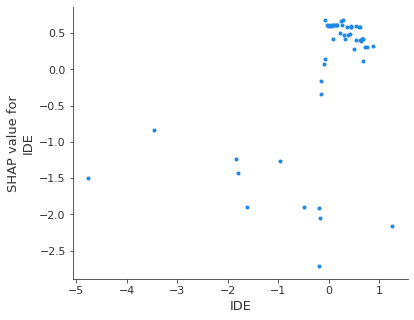

In [179]:
shap.dependence_plot('IDE', shap_values, X_train_std, interaction_index=None, show=False)


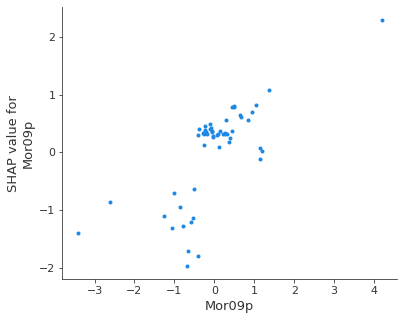

In [181]:
shap.dependence_plot('Mor09p', shap_values, X_train_std, interaction_index=None, show=False)


In [10]:
import graphviz
from sklearn import tree

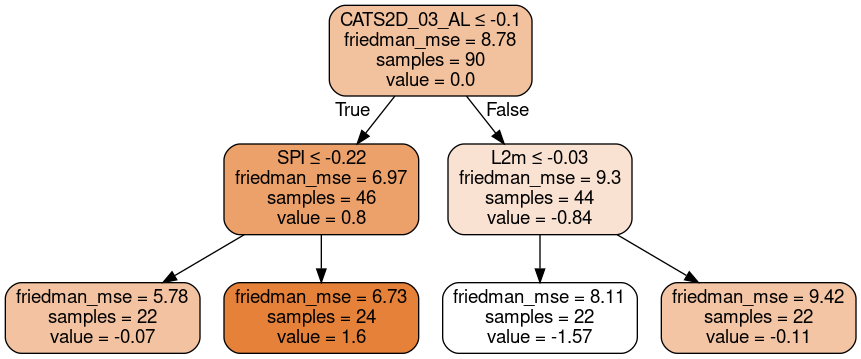

In [40]:
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
sub_tree = GBRT_model.estimators_[5, 0]
dot_data = export_graphviz(sub_tree, feature_names=X_train.columns[1:7] ,out_file=None, filled=True, rounded=True, special_characters=True, precision=2)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [28]:
GBRT_model.estimators_[100, 0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=22, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x154B680F98D0,
                      splitter='best')

In [41]:
GBRT_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=22, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=290,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=50, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [1]:
import pydotplus


In [149]:
import xgboost
import shap
# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.force(shap_values[0])

In [155]:
shap_values

.values =
array([[-0.15796366,  0.36092963,  0.34031455, -0.74526632,  0.14031869],
       [-0.33757485, -1.20523067, -0.52347613, -0.75129736,  0.27635697],
       [-1.25726832, -0.85534121,  0.55590066, -0.62144114,  0.24115662],
       [ 0.60346305, -1.39794355, -0.29791166, -0.12057635,  0.37001428],
       [-1.89990375, -1.10487462, -0.64013351, -0.75098446,  0.34114441],
       [-2.15937875, -1.97360912, -0.55766723, -0.68565303, -1.3209859 ],
       [ 0.30974042,  0.41182025, -0.19303837, -0.69629365, -0.89964328],
       [ 0.10843374, -1.79374098, -0.4030637 , -0.67133512, -1.660087  ],
       [ 0.61266851,  0.30875647, -0.34566182,  0.51132353,  0.2985611 ],
       [ 0.07867573,  0.34951831,  1.07439245, -0.55362412,  0.26446349],
       [ 0.58570012,  0.60446185, -0.3512115 ,  0.51971397,  0.28056306],
       [ 0.41809996,  0.33656262,  0.21954644,  0.53893692,  0.27212133],
       [ 0.46755641, -1.71667618, -0.42519577, -0.75129736, -0.82836662],
       [ 0.58245003, -1.1439